In [1]:
def f(i,s):
    
    return s-i

In [2]:
def c(i):
    if  i in ['sort','hash','md5','hello','cryptography']:
        return 'Webservice'
    if 'bigdata' in i:
        return 'Bigdata'
    if 'stream' in i:
        return 'Stream'
    return 'ML Inference'

In [1]:
import pandas as pd
col_data=["Platform","ActionName","Requests","StartTime","EndTime","Avg_RT","50%","75%","90%","95%","99%","throughputs","FailRate","Mode","OverallRequest"]
data = pd.read_csv("datas/overview.csv",names=col_data)

data['c'] = data.apply(lambda x:c(x.ActionName),axis=1)
data

ModuleNotFoundError: No module named 'pandas'

In [19]:
col_res = ["name","invokeTime","startTime","endTime","radio","schedulingLatency"]
result_kl = pd.read_csv("datas/kubeless/mix/result.csv",names=col_res)
result_of = pd.read_csv("datas/openfaas/mix/result.csv",names=col_res)
result_ow = pd.read_csv("datas/openwhisk/mix/result.csv",names=col_res)

In [20]:
result_ow['schedulingLatency'] = result_ow.apply(lambda x: f(x.invokeTime, x.startTime), axis=1)
result_ow['radio'] = result_ow.apply(lambda x: f(x.startTime, x.endTime), axis=1)
# result_kl['radio'] = result_kl.apply(lambda x: f(x.startTime, x.endTime), axis=1)
# result_of['radio'] = result_of.apply(lambda x: f(x.startTime, x.endTime), axis=1)

In [21]:
result_kl['Platform'] = "Kubeless"
result_of['Platform'] = "Openfaas"
result_ow['Platform'] = "Openwhisk"

In [22]:
import numpy as np
res = pd.concat([result_kl,result_of,result_ow])
# res.sort_values(by="invokeTime")

In [9]:
df1 = res.loc[res.Platform == 'Kubeless']
df1_np = df1[["radio","schedulingLatency"]].to_numpy()
df1_np

array([[   56,    15],
       [   48,    10],
       [   49,    12],
       ...,
       [17476,  3318],
       [   92,  2992],
       [   64,  2718]])

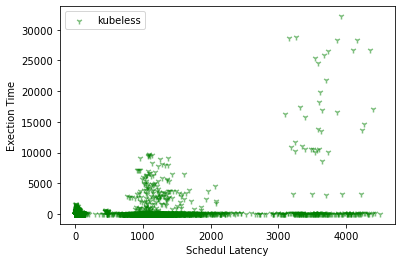

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

x = x
y = y
# s = np.random.rand(*x.shape) * 800 + 500
label = 'kubeless'
plt.scatter(x, y, c="g", alpha=0.5, marker='1',
            label=label)
plt.xlabel("Schedul Latency")
plt.ylabel("Exection Time")
plt.legend(loc='best')
plt.show()

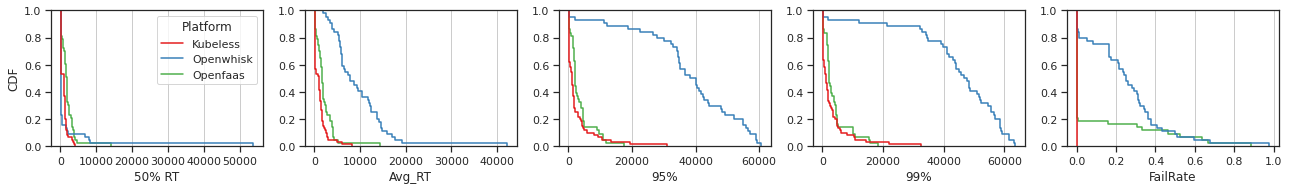

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
f, (ax1, ax2,ax3,ax4,ax6) = plt.subplots(1,5,figsize=(22, 2.5))



sns.ecdfplot(ax= ax1, data=data, x="50%",hue='Platform',palette="Set1", 
             complementary=True)
ax1.xaxis.grid(True)
ax1.set(ylabel="CDF")
ax1.set(xlabel="50% RT")


sns.ecdfplot(ax = ax2, data=data, x="Avg_RT",hue='Platform',palette="Set1",  legend=False,
             complementary=True)
ax2.xaxis.grid(True)
ax2.set(ylabel="")

sns.ecdfplot(ax = ax3, data=data, x="95%",hue='Platform',palette="Set1",  legend=False,
             complementary=True)
ax3.xaxis.grid(True)
ax3.set(ylabel="")

sns.ecdfplot(ax = ax4, data=data, x="99%",hue='Platform',palette="Set1",  legend=False,
             complementary=True)
ax4.xaxis.grid(True)
ax4.set(ylabel="")



sns.ecdfplot(ax= ax6, data=data, x="FailRate",hue='Platform',palette="Set1",legend=False,
             complementary=True)
ax6.xaxis.grid(True)
ax6.set(ylabel="")


plt.show()

f.savefig("RT.png", bbox_inches='tight', dpi=600)

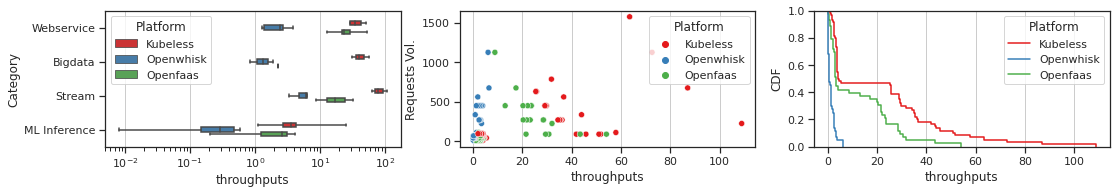

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, axs = plt.subplots(1,3,figsize=(18, 2.5))
axs[0].set_xscale("log")


# Plot the orbital period with horizontal boxes
sns.boxplot(ax = axs[0], x="throughputs", y="c", data=data,  hue='Platform',
            whis=[0, 100], width=.4, palette="Set1")

axs[0].xaxis.grid(True)
axs[0].set(ylabel="Category")

sns.scatterplot(ax= axs[1], data=data, x="throughputs", y="Requests",
                hue="Platform",palette="Set1")
axs[1].set(ylabel="Requests Vol.")
axs[1].xaxis.grid(True)

sns.ecdfplot(ax= axs[2], data=data, x="throughputs",hue='Platform',palette="Set1", legend=True,
            complementary=True)
axs[2].xaxis.grid(True)
axs[2].set(ylabel="CDF")

f.savefig("TP.png", bbox_inches='tight', dpi=600)

In [ ]:
sns.histplot(
    data=data_rt, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
)

In [57]:
# res['c'] = res.apply(lambda x:c(x.name),axis=1)
res
res['name']

0       sort-python
1       sort-python
2       sort-python
3       sort-python
4       sort-python
           ...     
7200        bigdata
7201        bigdata
7202        bigdata
7203        bigdata
7204        bigdata
Name: name, Length: 28590, dtype: object

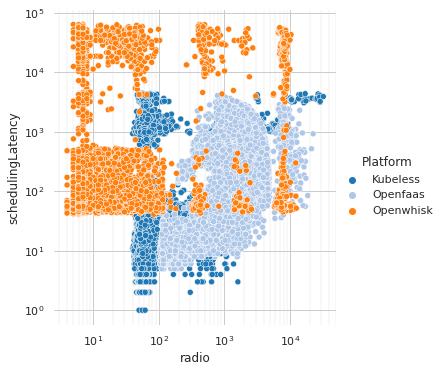

In [33]:
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
cmap= 'tab20'
g = sns.relplot(
    data=res,
    x="radio", y="schedulingLatency",
    hue="Platform",
    palette=cmap, 
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
# g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

Signature:
sns.relplot(
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    data=None,
    row=None,
    col=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=None,
    dashes=None,
    style_order=None,
    legend='auto',
    kind='scatter',
    height=5,
    aspect=1,
    facet_kws=None,
    units=None,
    **kwargs,
)
Docstring:
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions
that show the relationship between two variables with semantic mappings
of subsets. The ``kind`` parameter selects the underlying axes-level
function to use:

- :func:`scatterplot` (with ``kind="scatter"``; the default)
- :func:`lineplot` (with ``kind="line"``)

Extra keyword arguments are passed to the underlying function, so you
should refer to the d